In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.font_manager import FontProperties

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Figure 4.2: Video watching data

In [3]:

# generate some data
times_watched = np.round( np.abs(np.random.randn(500)*20) )/2

# force an outlier
times_watched[300] = 35


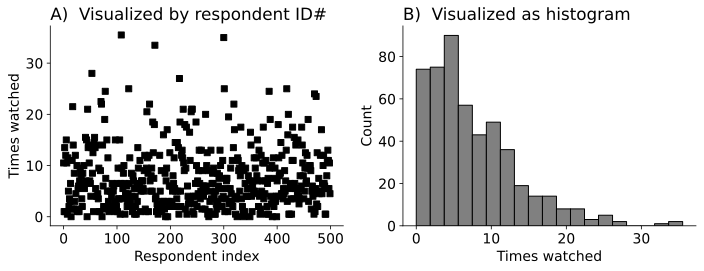

In [4]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(times_watched,'ks')
axs[0].set_xlabel('Respondent index')
axs[0].set_ylabel('Times watched')
axs[0].set_title(r'A)  Visualized by respondent ID#')

axs[1].hist(times_watched,bins='fd',color='gray',edgecolor='k')
axs[1].set_xlabel('Times watched')
axs[1].set_ylabel('Count')
axs[1].set_title(r'B)  Visualized as histogram')

# display the figure
plt.tight_layout()
plt.show()

### Fig 4.3: Two samples from the same population have similar distributions

In [5]:
# data
sample_a = np.random.randn(1500)*2 + np.pi** np.pi 
sample_b = np.random.randn(1500)*2 + np.pi** np.pi 

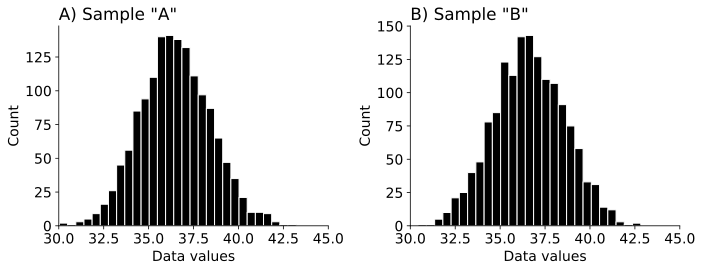

In [6]:
# plot
_, axs = plt.subplots(1,2,figsize=(10,4))

# first plot
axs[0].hist(sample_a, bins='fd', color='k', edgecolor='w')
axs[0].set(xlabel='Data values', ylabel='Count', xlim=[30,45])
axs[0].set_title(r'A) Sample "A"')

# second plot
axs[1].hist(sample_b, bins='fd', color='k', edgecolor='w')
axs[1].set(xlabel='Data values', ylabel='Count', xlim=[30,45])
axs[1].set_title(r'B) Sample "B"')

# display the figure
plt.tight_layout()
plt.show()

### Fig 4.4: analytical Gaussian (see Exercise 1)

### Fig 4.5: Examples of distributions

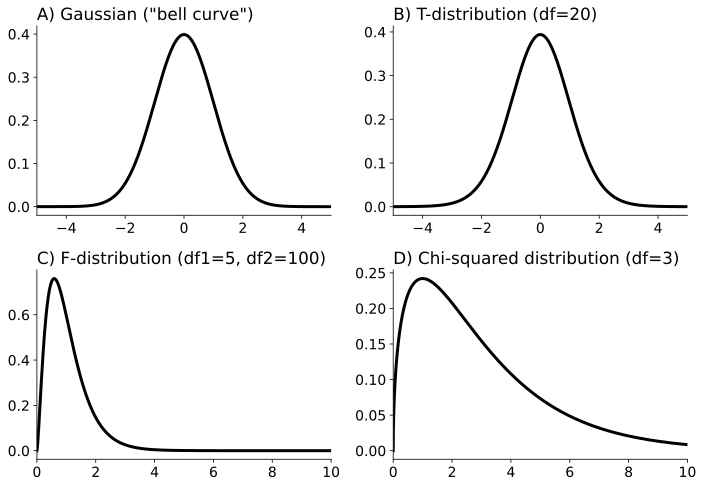

In [7]:
# data
x = np.linspace(-5,5,10001)

# plot
_, axs = plt.subplots(2,2,figsize=(10,7))

# Gaussian
y = stats.norm.pdf(x) 
axs[0,0].plot(x, y, 'k', lw=3)
axs[0,0].set_title(r'A) Gaussian ("bell curve")')
axs[0,0].set_xlim(x[[0,-1]])

# T
axs[0,1].plot(x, stats.t.pdf(x, 20), 'k', lw=3)
axs[0,1].set_title(r'B) T-distribution (df=20)')
axs[0,1].set_xlim(x[[0,-1]])

# F
x = np.linspace(0,10,10001)
axs[1,0].plot(x, stats.f.pdf(x,5,100), 'k', lw=3)
axs[1,0].set_title(r'C) F-distribution (df1=5, df2=100)')
axs[1,0].set_xlim(x[[0,-1]])

# Chi-squared
axs[1,1].plot(x, stats.chi2.pdf(x, 3), 'k', lw=3)
axs[1,1].set_title(r'D) Chi-squared distribution (df=3)')
axs[1,1].set_xlim(x[[0,-1]])

# display
plt.tight_layout()
plt.show()

### Fig 4.6: Examples of empirical distributions

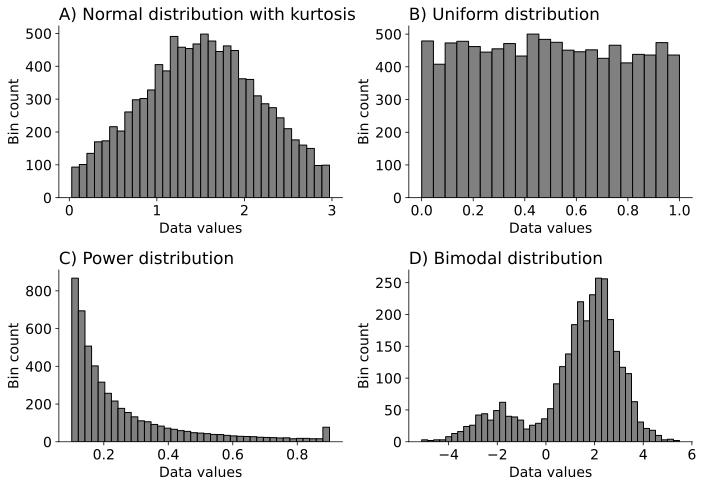

In [8]:
# plot
_, axs = plt.subplots(2,2,figsize=(10,7))

# normal distribution with kurtosis
X = np.arctanh(np.random.rand(10000)*1.8-0.9) + 1.5
axs[0,0].hist(X, bins='fd', color='gray', edgecolor='k')
axs[0,0].set_xlabel('Data values')
axs[0,0].set_ylabel('Bin count')
axs[0,0].set_title(r'A) Normal distribution with kurtosis')

# uniform distribution
X = np.random.rand(10000)
axs[0,1].hist(X, bins='fd', color='gray', edgecolor='k')
axs[0,1].set_xlabel('Data values')
axs[0,1].set_ylabel('Bin count')
axs[0,1].set_title(r'B) Uniform distribution')

# power distribution
f = np.linspace(1,10,5001)
X = 1/f + np.random.rand(len(f))/200
X[X> 0.9] = 0.9 # clipping
axs[1,0].hist(X, bins='fd', color='gray', edgecolor='k')
axs[1,0].set_xlabel('Data values')
axs[1,0].set_ylabel('Bin count')
axs[1,0].set_title(r'C) Power distribution')

# bimodal distribution
x1 = np.random.randn(500) - 2
x2 = np.random.randn(2500) + 2
X = np.concatenate((x1,x2))
axs[1,1].hist(X, bins='fd', color='gray', edgecolor='k')
axs[1,1].set_xlabel('Data values')
axs[1,1].set_ylabel('Bin count')
axs[1,1].set_title(r'D) Bimodal distribution')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.7: Characteristics of Distributions

In [9]:
# function variable
x = np.linspace(-4,4,101)

ss = [1,0.3,1]
cs = [0,0,-1]

colors = ['k', 'lightgray', 'darkgray']
styles = ['-', '--', ':']

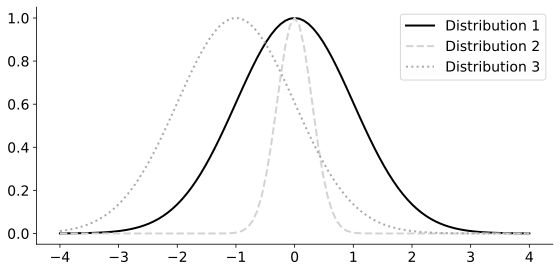

In [10]:
# plot
plt.figure(figsize=(8,4))

for s,c,col,sty in zip(ss,cs,colors,styles):
    
    # create gaussian
    gaus = np.exp(-(x-c)**2 / (2*s**2))
    plt.plot(x, gaus, color=col, linewidth=2, linestyle=sty)


plt.legend(['Distribution 1', 'Distribution 2', 'Distribution 3'], loc='upper right')

# display the figure
plt.tight_layout()
plt.show()

### Fig 4.9: Histogram showing mean

In [11]:
# generate a Laplace distribution
x1 = np.exp(-np.abs(3*np.random.randn(4000)))
x2 = np.exp(-np.abs(3*np.random.randn(4000)))
x = x1 -x2 + 1

# compute mean
x_bar = np.mean(x)

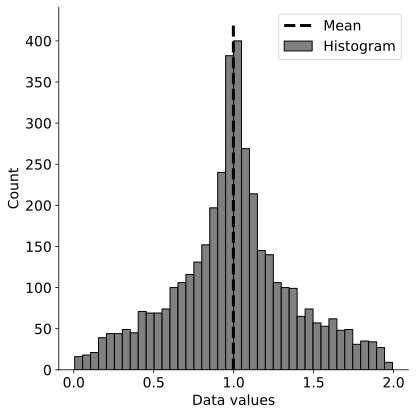

In [12]:
# plot histogram
plt.figure(figsize=(6,6))
plt.hist(x, bins='fd', color='gray', edgecolor='k')

# vertical line for mean
plt.plot([x_bar, x_bar], plt.gca().get_ylim(), '--', color='k', linewidth=3)

# legend and labels
plt.legend(['Mean', 'Histogram'])
plt.xlabel('Data values')
plt.ylabel('Count')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.10: "Failure" scenarios of the mean

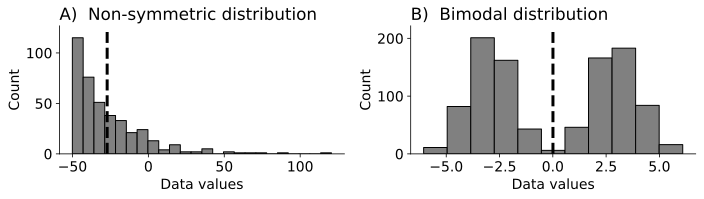

In [13]:
# plot
_, axs = plt.subplots(1,2, figsize=(10,3))

# case 1: mean doesn't reflect the most common value
data = [0,0]
data[0] = (np.random.randn(400)+2.5)**3 -50

# case 2: bimodal distribution
x1 = np.random.randn(500) - 3
x2 = np.random.randn(500) + 3
data[1] = np.concatenate((x1,x2))

# histograms and means
for i in range(2):

    # data average
    x_bar = np.mean(data[i])

    # histogram with vertical line for mean
    axs[i].hist(data[i], bins='fd', color='gray', edgecolor='k')
    axs[i].plot([x_bar, x_bar], axs[i].get_ylim(), '--', color='k', linewidth=3)
    axs[i].set_xlabel('Data values')
    axs[i].set_ylabel('Count')

# titles
axs[0].set_title(r'A)  Non-symmetric distribution')
axs[1].set_title(r'B)  Bimodal distribution')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.11: Median and Mean

In [13]:
# generate a laplace distribution
x1 = np.exp(-np.abs(3*np.random.randn(4000)))
x2 = np.exp(-np.abs(3*np.random.randn(4000)))
x = x1 -x2 + 1

# compute mean and median
mean = np.mean(x)
median = np.median(x)


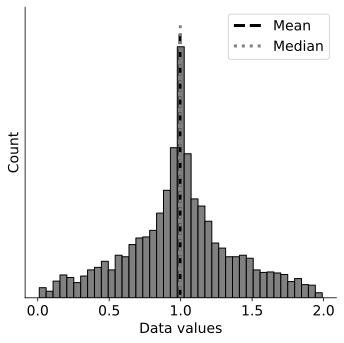

In [14]:
# plot
fig = plt.figure(figsize=(5,5))
plt.hist(x, bins='fd', color='gray', edgecolor='k')

# vertical line for mean and median
plt.plot([mean, mean], plt.gca().get_ylim(), '--', color='black', linewidth=3, label='Mean')
plt.plot([median, median], plt.gca().get_ylim(), ':', color='gray', linewidth=3, label='Median')

# legend and labels
plt.legend()
plt.xlabel('Data values')
plt.ylabel('Count')
plt.yticks([])

# display figure
plt.tight_layout()
plt.show()

### Fig 4.12: "Failures" of the median

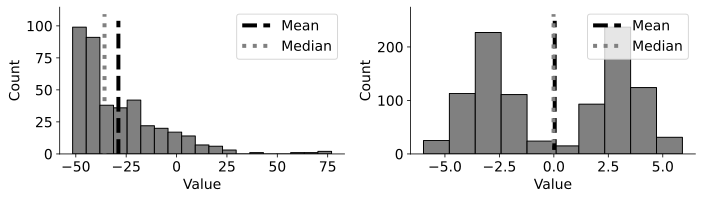

In [15]:
# plot
_, axs = plt.subplots(1,2,figsize=(10,3))

# case 1: mean does not reflect
data = [0,0]
data[0] = (np.random.randn(400)+2.5)**3 - 50

# case 2: bimodal distribution
x1 = np.random.randn(500) - 3
x2 = np.random.randn(500) + 3
data[1] = np.concatenate((x1,x2))


# histograms and means
for i in range(2):

  # data average
  mean = np.mean(data[i])
  median = np.median(data[i])

  # histogram with vertical line for mean
  axs[i].hist(data[i],bins='fd',color='gray',edgecolor='k')
  axs[i].plot([mean,mean],axs[i].get_ylim(),'--',
          color='k',linewidth=4,label='Mean')
  axs[i].plot([median,median],axs[i].get_ylim(),':',
          color='gray',linewidth=4,label='Median')
  axs[i].set_xlabel('Value')
  axs[i].set_ylabel('Count')
  axs[i].legend()


plt.tight_layout()
plt.show()

### Fig 4.13: Mode

In [16]:
# data
data = {
    "Monday": 5,
    "Tuesday": 7,
    "Wednesday": 14,
    "Thursday": 4,
    "Friday": 3,
    "Saturday": 11,
    "Sunday": 8
}

# compute the mode
mode = stats.mode(list(data.values()), keepdims=True)
mode[0]

array([3])

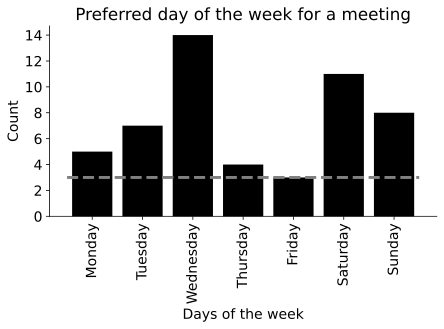

In [17]:
# plot
plt.bar(range(len(data)), data.values(), color='k')

# horizontal line for mode
plt.plot([-0.5, len(data)-0.5], [mode[0], mode[0]], '--', color='gray', linewidth=3)

# ticks
plt.xticks(range(len(data)), labels=data.keys(), rotation=90)
plt.yticks(range(0,15,2))

# labels
plt.ylabel('Count')
plt.xlabel('Days of the week')
plt.title(r'Preferred day of the week for a meeting', loc='center')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.14: Dispersion

In [18]:
# data 
x1 = np.random.randn(1000) * 2 + 70
x2 = np.random.randn(1000) * 8 + 70

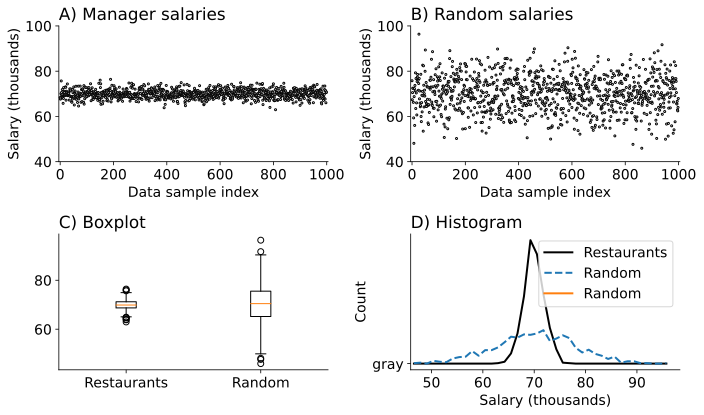

In [19]:
# plot
_, axs = plt.subplots(2,2, figsize=(10,6))


# first plot
axs[0,0].plot(x1, 'ko', markerfacecolor='w', markersize=2)
axs[0,0].set_ylim([40,100])
axs[0,0].set_xlim([-5, len(x1)+5])
axs[0,0].set_title(r"A) Manager salaries")
axs[0,0].set_ylabel('Salary (thousands)')
axs[0,0].set_xlabel('Data sample index')


# second plot
axs[0,1].plot(x2, 'ko', markerfacecolor='w', markersize=2)
axs[0,1].set_ylim([40,100])
axs[0,1].set_xlim([-5, len(x2)+5])
axs[0,1].set_title(r"B) Random salaries")
axs[0,1].set_ylabel('Salary (thousands)')
axs[0,1].set_xlabel('Data sample index')


# third plot
axs[1,0].boxplot([x1,x2])
axs[1,0].set_xticklabels(['Restaurants', 'Random'])
axs[1,0].set_title(r"C) Boxplot")

# fourth plot
y1, x = np.histogram(x1, bins=np.linspace(np.min(x2), np.max(x2), 41))
y2, x = np.histogram(x2, bins=np.linspace(np.min(x2), np.max(x2), 41))
x = (x[:-1] + x[1:]) / 2

# plot is showing an extra artifact in legend? (orange line with random)
axs[1,1].plot(x,y1, 'k', linewidth=2, label='Restaurants')
axs[1,1].plot(x,y2, '--', 'gray', linewidth=2, label='Random')
axs[1,1].set_title(r"D) Histogram")
axs[1,1].set_xlabel('Salary (thousands)')
axs[1,1].set_ylabel('Count')
axs[1,1].legend()
axs[1,1].set_xlim([np.min(x2), np.max(x2)+2])

# display figure
plt.tight_layout()
plt.show()

### Fig 4.16: Homo/heteroscedasticity

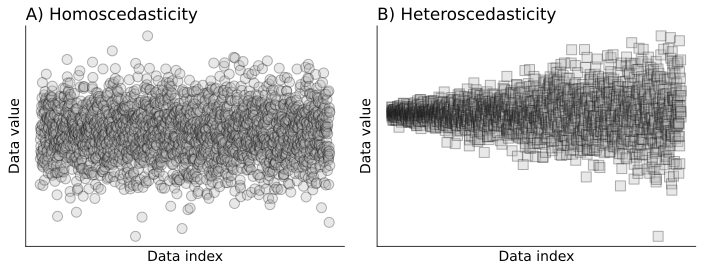

In [6]:
# sample size and x-axis grid
n = 2345
x = np.linspace(1,10,n)

# generate some data
ho = np.random.randn(n)
he = np.random.randn(n) * x


# vplot
_,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x,ho,'ko',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.3)
axs[0].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[0].set_title(r'A) Homoscedasticity')

axs[1].plot(x,he,'ks',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.3)
axs[1].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[1].set_title(r'B) Heteroscedasticity')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.17: FWHM

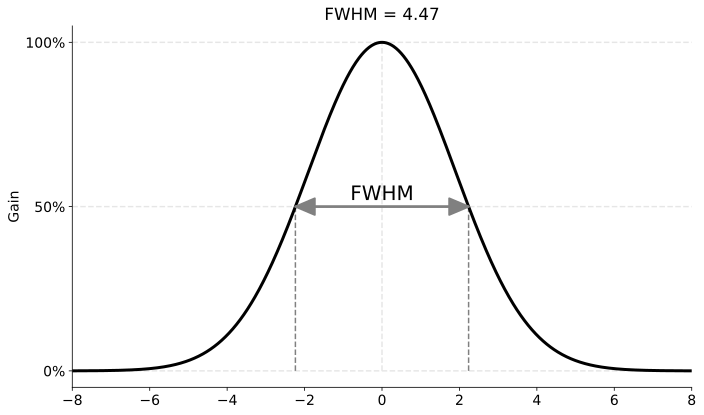

In [7]:
# pdf to comapre with analytic
x = np.linspace(-8,8,1001)
s = 1.9

# create the Gaussian and compute its analytic FWHM
pureGaus = np.exp( (-x**2)/(2*s**2) )
fwhm = 2*s*np.sqrt(2*np.log(2))

plt.figure(figsize=(10,6))

# plot guide lines
plt.plot(x[[0,-1]],[.5,.5],'--',color=(.9,.9,.9))
plt.plot(x[[0,-1]],[1,1],'--',color=(.9,.9,.9))
plt.plot(x[[0,-1]],[0,0],'--',color=(.9,.9,.9))
plt.plot([0,0],[0,1],'--',color=(.9,.9,.9))
plt.plot([-fwhm/2,-fwhm/2],[0,.5],'--',color=(.5,.5,.5))
plt.plot([fwhm/2,fwhm/2],[0,.5],'--',color=(.5,.5,.5))

# plot the gaussian
plt.plot(x,pureGaus,'k',linewidth=3)

# plot arrows
plt.arrow(-fwhm/2,.5,fwhm,0, color=(.5,.5,.5),linewidth=2,zorder=10,
          head_width=.05,head_length=.5,length_includes_head=True)
plt.arrow(fwhm/2,.5,-fwhm,0, color=(.5,.5,.5),linewidth=2,zorder=10,
          head_width=.05,head_length=.5,length_includes_head=True)

plt.text(0,.52,'FWHM',horizontalalignment='center',fontsize=20)
plt.xlim(x[[0,-1]])
plt.yticks([0,.5,1],labels=['0%','50%','100%'])
plt.ylabel('Gain')
plt.title(f'FWHM = {fwhm:.2f}',loc='center')

# display figure
plt.tight_layout()
plt.show()
     

### Fig 4.18: Fano factor

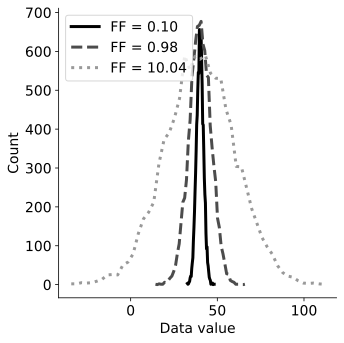

In [22]:
# keep mean fixed while varying sigma and show histograms

fanos = [ .1,1,10 ]
mean = 40

# deriving the std from the fano factor:
# ff = s^2/m
#  s = sqrt(ff*m)


plt.figure(figsize=(5,5))
lines = [ '-','--',':' ]
for i in range(len(fanos)):

  # generate data
  sigma = np.sqrt(fanos[i]*mean)
  x = np.random.normal(mean,sigma,size=10000)

  # compute empirical fano factor
  ff = np.var(x,ddof=1) / np.mean(x)

  # get histogram
  yy,xx = np.histogram(x,bins=50)

  # plot the line
  c = i*.9/len(fanos) # grayscale defined by index
  plt.plot((xx[0:-1]+xx[1:])/2,yy,linestyle=lines[i],
           linewidth=3,color=(c,c,c),label=f'FF = {ff:.2f}')


plt.legend()
plt.xlabel('Data value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
     


### Fig 4.20: Interquartile range

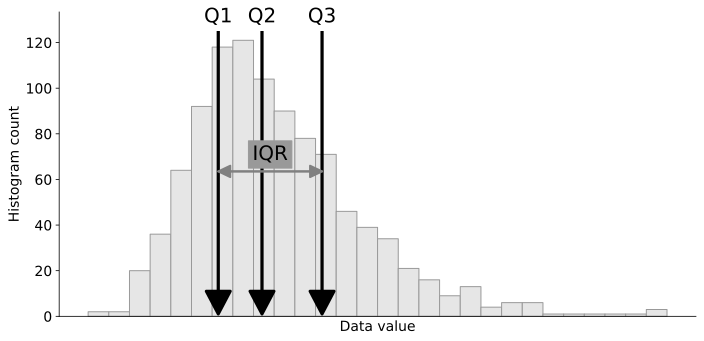

In [8]:
# Create a dataset 
x = np.exp( np.random.randn(1000)/3 )

# and find its quartiles
quartiles = np.percentile(x,[25,50,75])

# plot the histogram
plt.figure(figsize=(10,5))
plt.hist(x,bins='fd',color=(.9,.9,.9),edgecolor=(.6,.6,.6))

# draw lines for the quartiles
ylim = plt.gca().get_ylim()
for q in quartiles:
  plt.arrow(q,ylim[1],0,-ylim[1]+1, color='k',linewidth=3,
          head_width=.1,head_length=10,length_includes_head=True)

# horizontal arrow
plt.arrow(quartiles[0],ylim[1]/2,quartiles[2]-quartiles[0],0, color=(.5,.5,.5),linewidth=2,zorder=10,
          head_width=5,head_length=.05,length_includes_head=True)
plt.arrow(quartiles[2],ylim[1]/2,quartiles[0]-quartiles[2],0, color=(.5,.5,.5),linewidth=2,zorder=10,
          head_width=5,head_length=.05,length_includes_head=True)

plt.text(np.mean(quartiles[[0,2]]),ylim[1]/2+5,'IQR',horizontalalignment='center',fontsize=20,backgroundcolor=(.6,.6,.6))

for i in range(3):
  plt.text(quartiles[i],ylim[1],'Q'+str(i+1),horizontalalignment='center',verticalalignment='bottom',fontsize=20,backgroundcolor='w')


# labels
plt.xlabel('Data value')
plt.xticks([])
plt.ylabel('Histogram count')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# display figure
plt.tight_layout()
plt.show()

### Fig 4.21: QQ Plot

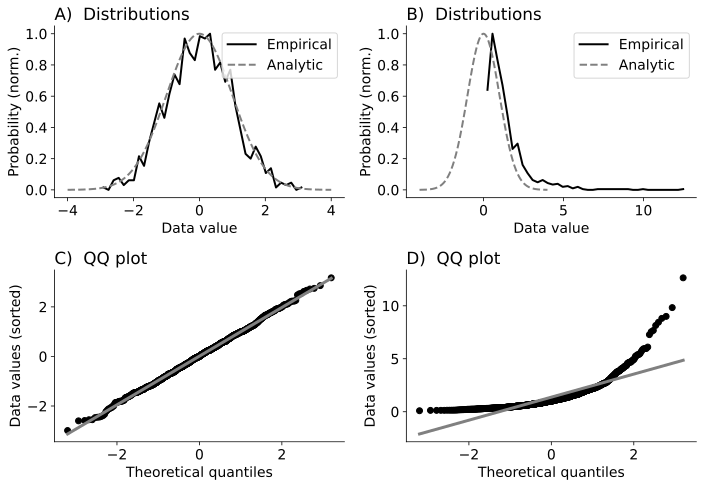

In [10]:
# generate two datasets
n = 1000
d1 = np.random.randn(n) # normal
d2 = np.exp( d1*.8 )    # non-normal


# data for histograms
y1,x1 = np.histogram(d1,bins=40)
y1 = y1/np.max(y1)
x1 = (x1[:-1]+x1[1:])/2

y2,x2 = np.histogram(d2,bins=40)
y2 = y2/np.max(y2)
x2 = (x2[:-1]+x2[1:])/2



# analytic normal distribution
x = np.linspace(-4,4,10001)
norm = stats.norm.pdf(x)
norm = norm/np.max(norm)


# plots
_,axs = plt.subplots(2,2,figsize=(10,7))
axs[0,0].plot(x1,y1,'k',linewidth=2,label='Empirical')
axs[0,0].plot(x,norm,'--',color='gray',linewidth=2,label='Analytic')
axs[0,0].legend()
axs[0,0].set_xlabel('Data value')
axs[0,0].set_ylabel('Probability (norm.)')
axs[0,0].set_title(r'A)  Distributions')

axs[0,1].plot(x2,y2,'k',linewidth=2,label='Empirical')
axs[0,1].plot(x,norm,'--',color='gray',linewidth=2,label='Analytic')
axs[0,1].legend()
axs[0,1].set_xlabel('Data value')
axs[0,1].set_ylabel('Probability (norm.)')
axs[0,1].set_title(r'B)  Distributions')




# QQ plots
stats.probplot(d1,plot=axs[1,0],fit=True)
stats.probplot(d2,plot=axs[1,1],fit=True)

for i in range(2):
  axs[1,i].get_lines()[0].set(markerfacecolor='k',markeredgecolor='k')
  axs[1,i].get_lines()[1].set(color='gray',linewidth=3)
  axs[1,i].set_title(' ')
  axs[1,i].set_ylabel('Data values (sorted)')

axs[1,0].set_title(r'C)  QQ plot')
axs[1,1].set_title(r'D)  QQ plot')

# display figure
plt.tight_layout()
plt.show()

### Fig 4.22: Table for moments

In [25]:
# data
col_labs = ['Moment number', 'Name', 'Description', 'Formula']

table_data = [ ['First', 'Mean', 'Average', r'$m_1 = N^{-1}\sum_{i=1}^{N}X_i$'],
               ['Second', 'Variance', 'Dispersion', r'$m_2 = N^{-1}\sum_{i=1}^{N}(X_i - \bar{X})^2$'],
               ['Third', 'Skewness', 'Asymmetry', r'$m_3 = N^{-1}\sum_{i=1}^{N}(X_i - \bar{X})^3$'],
               ['Fourth', 'Kurtosis', 'Tail fatness', r'$m_4 = N^{-1}\sum_{i=1}^{N}(X_i - \bar{X})^4$'] ]


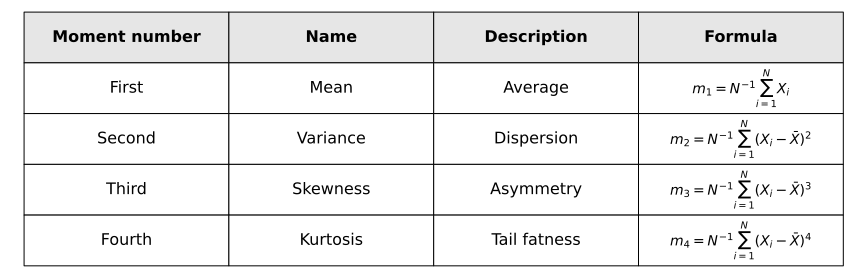

In [40]:
# draw table
fig, ax = plt.subplots(figsize=(12,4))
ax.set_axis_off()
ht = ax.table(
    cellText = table_data,
    colLabels = col_labs,
    colColours=[(0.9,0.9,0.9)]*len(col_labs),
    cellLoc = 'center',
    loc = 'upper left',
)

# font adjustments
ht.scale(1, 3.8)
ht.auto_set_font_size(False)
ht.set_fontsize(14)

for (row,col), cell in ht.get_celld().items():
    cell.set_text_props(fontproperties=FontProperties(family='serif')) 
    if row==0: cell.set_text_props(fontproperties=FontProperties(weight='bold', size=16))
    if col < 3 and row > 0: cell.set_text_props(fontproperties=FontProperties(size=16))

# display
plt.tight_layout()
plt.show()

### Fig 4.23: Skew

In [41]:
# data (F distribution)
x = np.linspace(0,4,10001)
y = stats.f.pdf(x, 10, 100)
y = y/np.max(y)
y_bar = np.sum(y)* np.mean(np.diff(x))

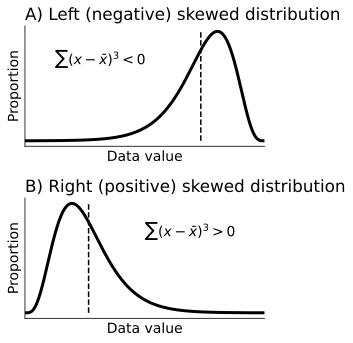

In [44]:
# plot 1
_, axs = plt.subplots(2, 1, figsize=(4,5))
axs[0].plot(-x, y, 'k', linewidth=3)
axs[0].plot([-y_bar, -y_bar], [0,1], 'k--')

# labels and limits
axs[0].set_title(r'A) Left (negative) skewed distribution')
axs[0].set(xlim=-x[[-1, 0]])
axs[0].set_ylabel('Proportion')
axs[0].set_xlabel('Data value')
axs[0].text(-3.5,0.7,r'$\sum(x-\bar{x})^3 < 0$')

# plot 2
axs[1].plot(x, y, 'k', linewidth=3)
axs[1].plot([y_bar, y_bar], [0,1], 'k--')

# labels and limits
axs[1].set_title(r'B) Right (positive) skewed distribution')
axs[1].set(xlim=x[[0, -1]])
axs[1].text(2, 0.7, r'$\sum(x-\bar{x})^3 > 0$')
axs[1].set_ylabel('Proportion')
axs[1].set_xlabel('Data value')

for a in axs: a.set(xticks=[], yticks=[])

# display figure
plt.tight_layout()
plt.show()

### Fig 4.24: Kurtosis

In [45]:
# generate distribution
x = np.linspace(-3,3,10001)
g = [None] * 3
g[0] = np.exp(-0.5*x**2)
g[1] = np.exp(-x**2)
g[2] = np.exp(-10*x**4)

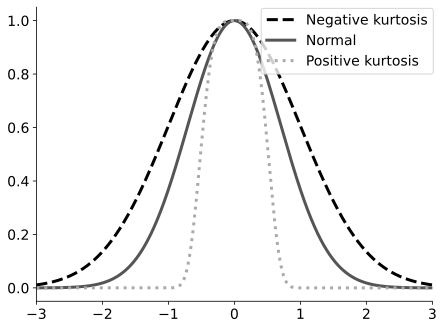

In [46]:
# plot
s = ['--', '-', ':']
n = ['Negative kurtosis', 'Normal', 'Positive kurtosis']
for i in range(3):
    plt.plot(x, g[i], color=(i/3,i/3,i/3), linewidth=3, linestyle=s[i], label=n[i])

plt.legend(loc='upper right', bbox_to_anchor=(1.02, 1.02))
plt.xlim(x[[0, -1]])

# display figure
plt.tight_layout()
plt.show()

### Fig 4.25: Different kurtosis with the same variance

In [48]:
# to manipulate kurtosis
x1 = np.exp(-np.abs(3*np.random.randn(4000)))
x2 = np.exp(-np.abs(3*np.random.randn(4000)))
d1 = x1-x2 + 1
d2 = np.random.rand(4000)
d3 = np.random.randn(4000)

# to manipulate skewness
# d1 = np.random.randn(4000)
# d2 = np.exp(np.random.randn(4000)/2)
# d3 = -np.exp(np.random.randn(4000)/2)

# gather into a list
data = [d1, d2, d3]

S = np.zeros((len(data),4))
i = 0
data_label = []

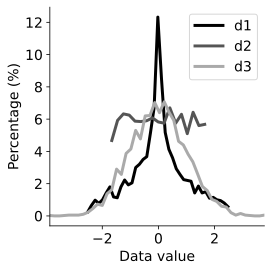

In [49]:
# plot
plt.figure(figsize=(4,4))

for x in data:

    # normalization
    x = (x - np.mean(x)) / np.std(x)

    # histogram 
    y1, x1 = np.histogram(x, bins='fd')
    x1 = (x1[:-1] + x1[1:]) / 2
    y1 = 100 * y1 / np.sum(y1)
    plt.plot(x1, y1, linewidth=3, color=(i/3,i/3,i/3))
    data_label.append('d'+str(i+1))

    # compute moments
    S[i,:] = np.mean(x), np.var(x, ddof=1), stats.skew(x), stats.kurtosis(x)
    i += 1

# plot labels
plt.legend(data_label)
plt.xlabel('Data value')
plt.ylabel('Percentage (%)')
plt.xlim([np.min(x1), np.max(x1)])

# display figure
plt.tight_layout()
plt.show()

In [51]:
# print out the moments
df = pd.DataFrame(S, columns=['Mean', 'Variance', 'Skewness', 'Kurtosis'], index=data_label)
from IPython.display import display
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(df)

,Mean,Variance,Skewness,Kurtosis
d1,0.00,1.00,0.03,0.09
d2,-0.00,1.00,0.00,-1.19
d3,0.00,1.00,0.05,-0.03


### Fig 4.27: Histogram bins

In [58]:
# table data
col_labs = ['Method', 'Formula', 'Key advantage']
table_data = [ ['Artitrary', r'$k=40$', 'Simple'],
              ['Sturges', r'$k=\lceil \log_2(N)\rceil$', 'Depends on count'],
              ['Friedman-Diaconis', r'$w = 2\frac{IQR}{\sqrt[3]{3}}$', 'Depends on count and spread']]

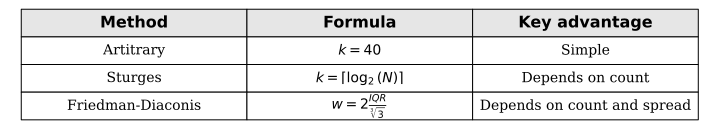

In [59]:
# draw table
fig, ax = plt.subplots(figsize=(10,2))
ax.set_axis_off()
ht = ax.table(
    cellText = table_data,
    colLabels = col_labs,
    colColours=[(0.9,0.9,0.9)]*len(col_labs),
    cellLoc = 'center',
    loc = 'upper left',
)

# font adjustments
ht.scale(1, 2.5)
ht.auto_set_font_size(False)
ht.set_fontsize(14)

for (row,col), cell in ht.get_celld().items():
    cell.set_text_props(fontproperties=FontProperties(family='serif')) 
    if row==0: cell.set_text_props(fontproperties=FontProperties(weight='bold', size=16))

# display figure
plt.tight_layout()
plt.show()

### Fig 4.28: variable histogram bins

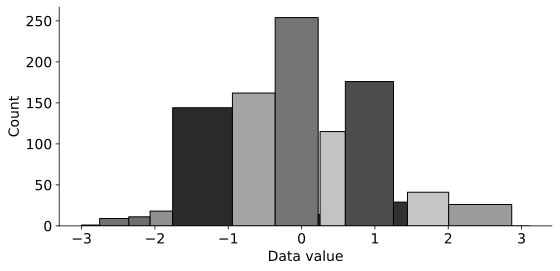

In [60]:
# random bin edges
bw = np.array([-3])
while bw[-1] < 3:
    bw = np.append(bw, bw[-1]+np.random.rand(1))

# histogram
plt.figure(figsize=(8,4))
_,_,hs = plt.hist(np.random.randn(1000), bins=bw, edgecolor='k')

# random grayscale color to each bar
for h in hs:
    c = np.random.uniform(low=0.1, high=0.9, size=1)[0]
    h.set_facecolor((c,c,c))

# plot labels
plt.xlabel('Data value')
plt.ylabel('Count')

# display figure
plt.tight_layout()
plt.show()